In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [5]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

da = pd.read_excel('다나와 상품.xlsx')
da = da.drop_duplicates(subset=['name.1'])

co = pd.read_excel('커뮤니티 상품 DB.xlsx')
co = co.drop_duplicates(subset=['title'])

In [6]:
da['name.1'] = da['name.1'].fillna('').astype(str)
co['title'] = co['title'].fillna('').astype(str)

texts = da['name.1'].tolist()

In [7]:
# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

In [8]:

sse = []
silhouette_scores = []
k_range = range(2, 11)  

for k in k_range:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

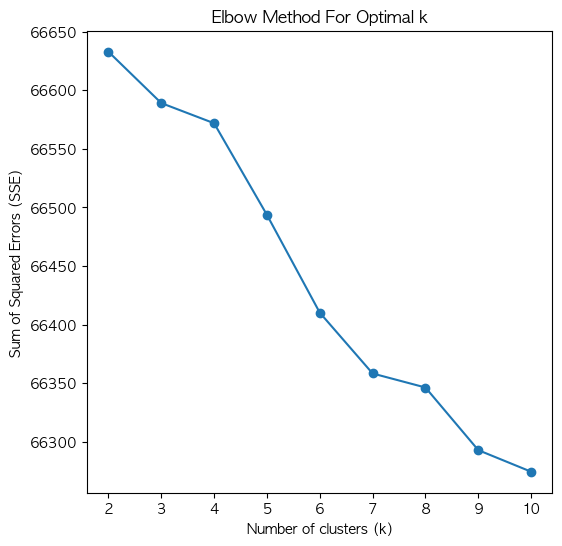

In [9]:
plt.figure(figsize=(6, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()

In [10]:
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters (k): {optimal_k}')

Optimal number of clusters (k): 9


In [11]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [12]:
# DBSCAN 클러스터링
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')  # eps와 min_samples는 데이터에 따라 조정 필요
labels = dbscan.fit_predict(X)

# 클러스터링 결과를 데이터프레임에 추가
result_da = da.copy()
result_co = co.copy()

result_da['cluster'] = labels[:len(da)]
result_co['cluster'] = labels[len(da):]

# 실루엣 스코어 계산 (음수 값도 존재할 수 있음)
silhouette_avg = silhouette_score(X, labels, metric='cosine') if len(set(labels)) > 1 else -1
print(f'Silhouette Score: {silhouette_avg}')

# 결과 출력
print(result_da)
print(result_co)

ValueError: Length of values (0) does not match length of index (125930)

In [ ]:
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import re

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

# 데이터 불러오기
da = pd.read_excel('다나와 상품.xlsx')
da = da.drop_duplicates(subset=['name.1'])

co = pd.read_excel('커뮤니티 상품 DB.xlsx')
co = co.drop_duplicates(subset=['title'])

def preprocess_text(text):
    if isinstance(text, str):
        return re.sub(r'[^\s\d\w]', '', text)
    return ''

da['name.1'] = da['name.1'].apply(preprocess_text)
co['title'] = co['title'].apply(preprocess_text)

da['name.1'] = da['name.1'].fillna('').astype(str)
co['title'] = co['title'].fillna('').astype(str)

# 텍스트 데이터를 하나의 리스트로 결합
texts = da['name.1'].tolist() + co['title'].tolist()

In [14]:
# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# DBSCAN 클러스터링
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
labels = dbscan.fit_predict(X)

In [ ]:
# 다양한 eps 및 min_samples 값에 대해 DBSCAN 클러스터링 수행
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [5, 10, 15]




In [ ]:
best_eps = 0
best_min_samples = 0
best_silhouette_score = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='cosine')
        labels = dbscan.fit_predict(X)

        # 시루엣 스코어 계산 (노이즈 제외)
        labels_filtered = labels[labels != -1]
        X_filtered = X[labels != -1]

        if len(set(labels_filtered)) > 1:  # 클러스터가 2개 이상이어야 실루엣 스코어 계산 가능
            silhouette_avg = silhouette_score(X_filtered, labels_filtered, metric='cosine')
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples

print(f'Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best silhouette score: {best_silhouette_score}')


NameError: name 'DBSCAN' is not defined

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# 데이터 차원 축소
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

# 클러스터링 결과를 데이터프레임에 추가
result_df = pd.DataFrame(X_reduced, columns=['Component 1', 'Component 2'])
result_df['Cluster'] = labels

# 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Component 1', y='Component 2', hue='Cluster', palette='tab10', data=result_df, legend='full')
plt.title('DBSCAN Clustering Results')
plt.show()


NameError: name 'X' is not defined